In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [98]:
data = pd.read_csv('Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [100]:
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA', 'Marital Status', 'Depression', 'Anxiety', 'Panic Attack', 'Treatment']

In [101]:
data.drop("Timestamp",axis=1,inplace=True)

In [102]:
data.head(0)

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment


In [103]:
data.isnull().sum()

,0
Gender,0
Age,1
Course,0
Year of Study,0
CGPA,0
Marital Status,0
Depression,0
Anxiety,0
Panic Attack,0
Treatment,0


In [104]:
data.duplicated().any()

False

In [105]:
data.dropna(inplace=True)

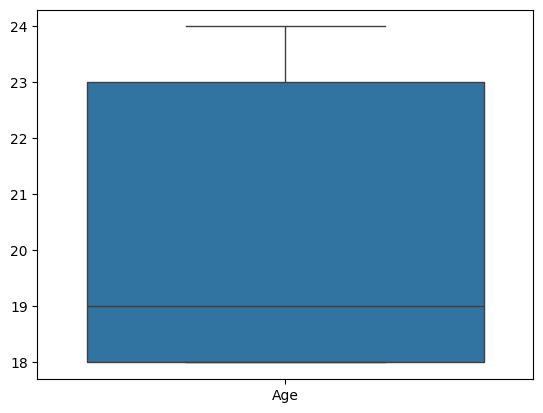

In [106]:
numerical_cols = data.select_dtypes(include='number').columns
sns.boxplot(data=data[numerical_cols])
plt.show()

In [107]:
data['CGPA'] = data['CGPA'].str.strip()

In [108]:
def convert_cgpa_range(cgpa_range):
    cgpa_values = cgpa_range.split('-')
    midpoint = (float(cgpa_values[0]) + float(cgpa_values[1])) / 2
    return midpoint

In [109]:
data['CGPA'] = data['CGPA'].apply(convert_cgpa_range)
print(data['CGPA'].unique())

[3.245 3.75  2.745 2.245 0.995]


In [110]:
data['Year of Study'] = data['Year of Study'].str.lower().str.replace('year', '').str.strip().map({'1': 1, '2': 2, '3': 3, '4': 4})
print(data['Year of Study'].unique())

[1 2 3 4]


In [111]:
binary_columns = ['Marital Status','Depression', 'Anxiety', 'Panic Attack', 'Treatment']
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})

In [112]:
data.head()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,1,3.245,0,1,0,1,0
1,Male,21.0,Islamic education,2,3.245,0,0,1,0,0
2,Male,19.0,BIT,1,3.245,0,1,1,1,0
3,Female,22.0,Laws,3,3.245,1,1,0,0,0
4,Male,23.0,Mathemathics,4,3.245,0,0,0,0,0


In [113]:
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [114]:
course_mapping = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}

data['Course'] = data['Course'].str.lower().str.strip().map(course_mapping)
data.Course.unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathematics',
       'BCS', 'Human Resources', 'IRKHS', 'Psychology', 'KENMS',
       'Accounting', 'ENM', 'Marine Science', 'KOE', 'Banking Studies',
       'Business Administration', nan, 'KIRKHS', 'Usuluddin', 'TAASL',
       'ALA', 'Biomedical Science', 'BENL', 'IT', 'CTS', 'Economics',
       'MHSC', 'MALCOM', 'KOP', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Fiqh', 'Nursing'], dtype=object)

In [115]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [116]:
label_encoder = LabelEncoder()
data['Course'] = label_encoder.fit_transform(data['Course'])

In [117]:
data.head()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
0,0,18.0,15,1,3.245,0,1,0,1,0
1,1,21.0,22,2,3.245,0,0,1,0,0
2,1,19.0,4,1,3.245,0,1,1,1,0
3,0,22.0,27,3,3.245,1,1,0,0,0
4,1,23.0,31,4,3.245,0,0,0,0,0


**Exploratory Data Analysis**

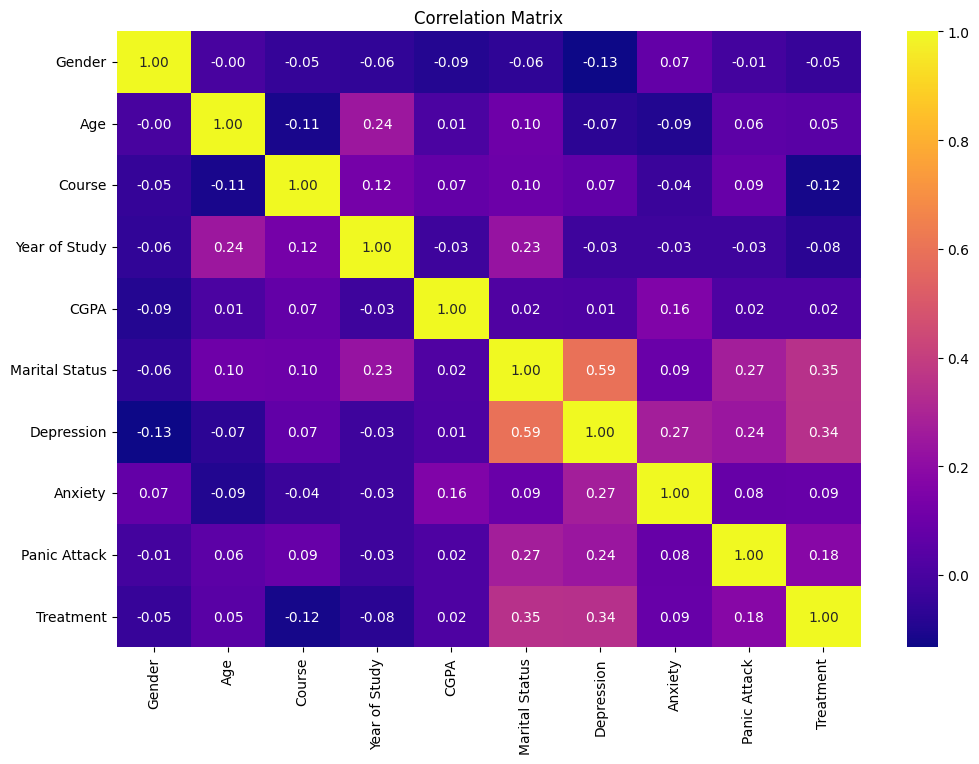

In [118]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

In [119]:
data['CGPA'].unique()

array([3.245, 3.75 , 2.745, 2.245, 0.995])

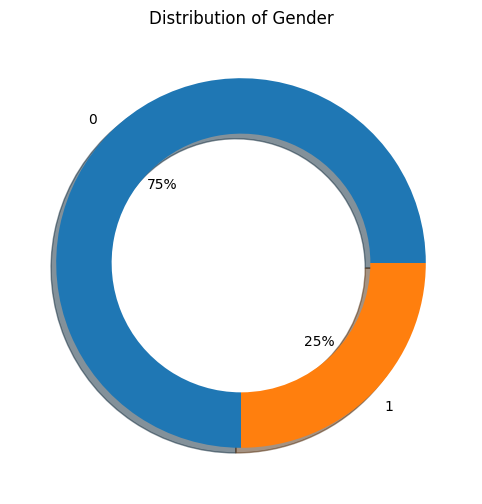

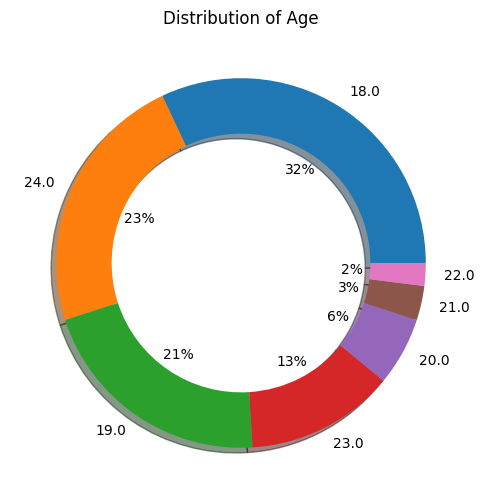

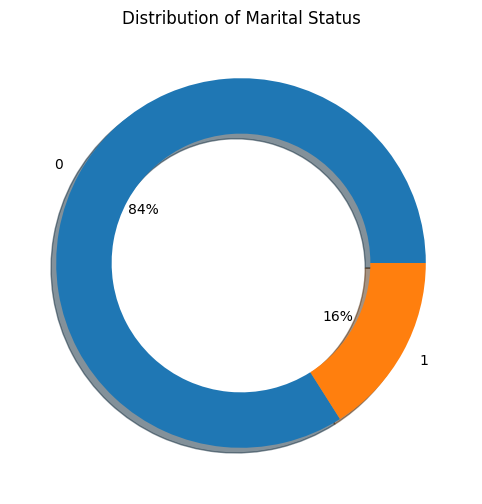

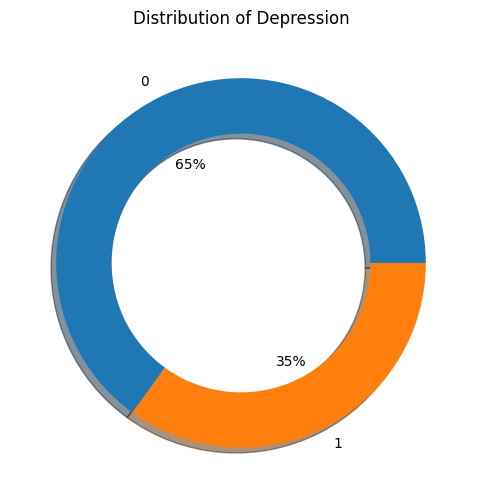

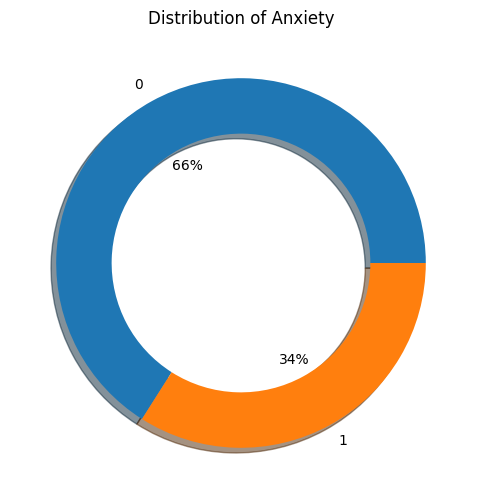

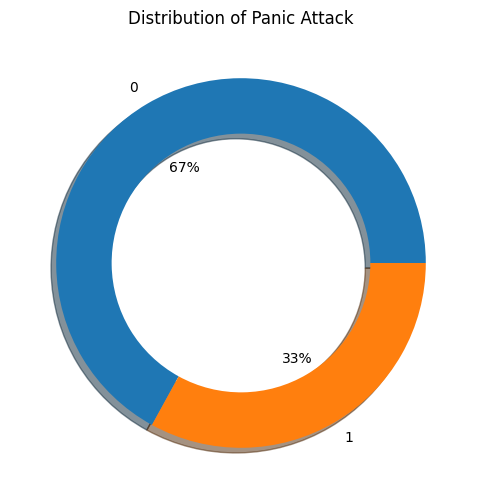

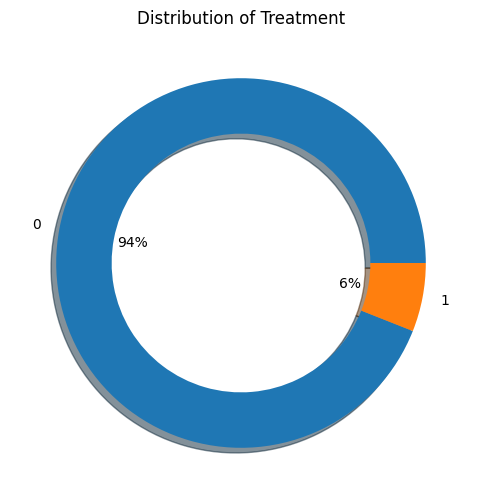

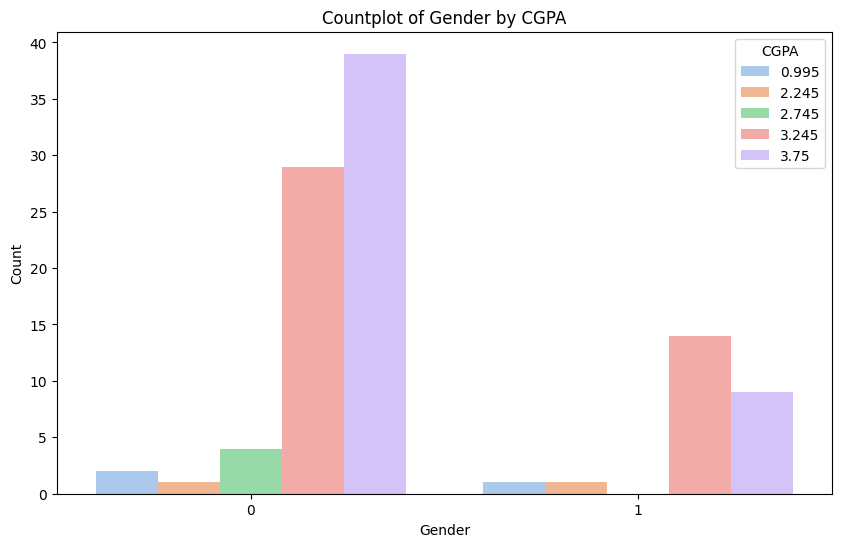

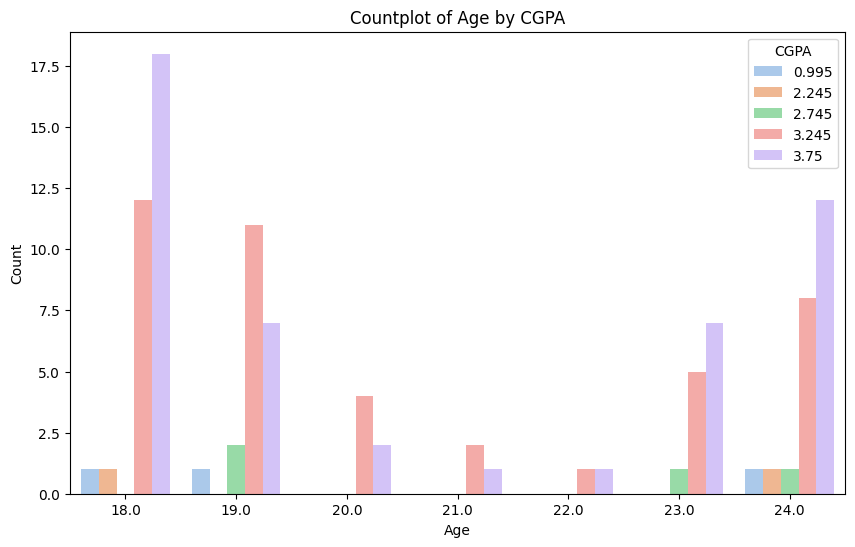

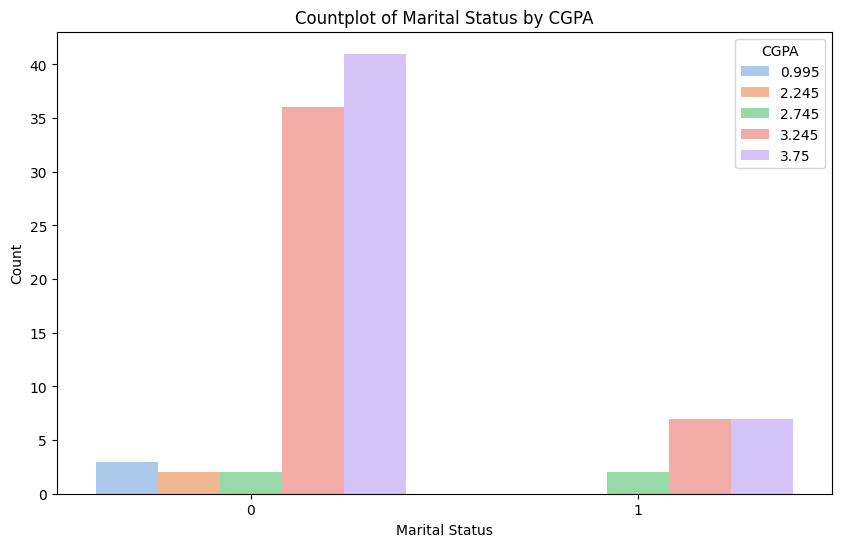

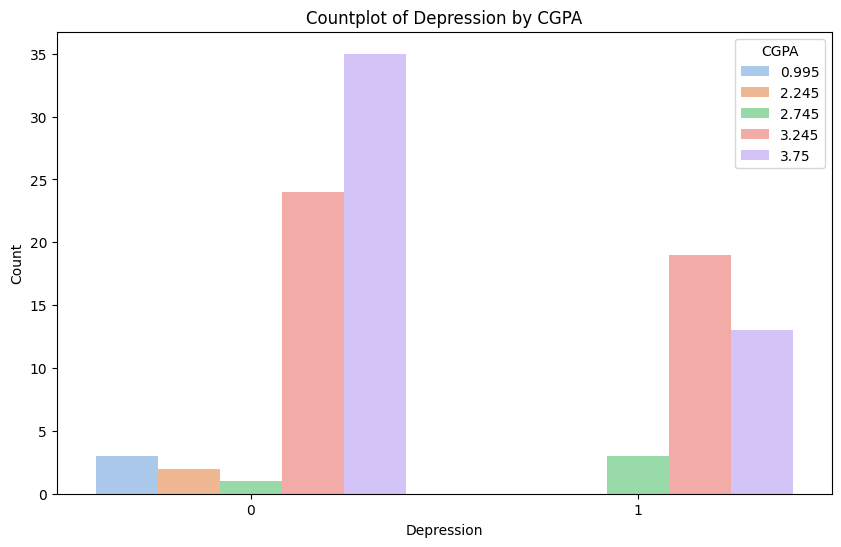

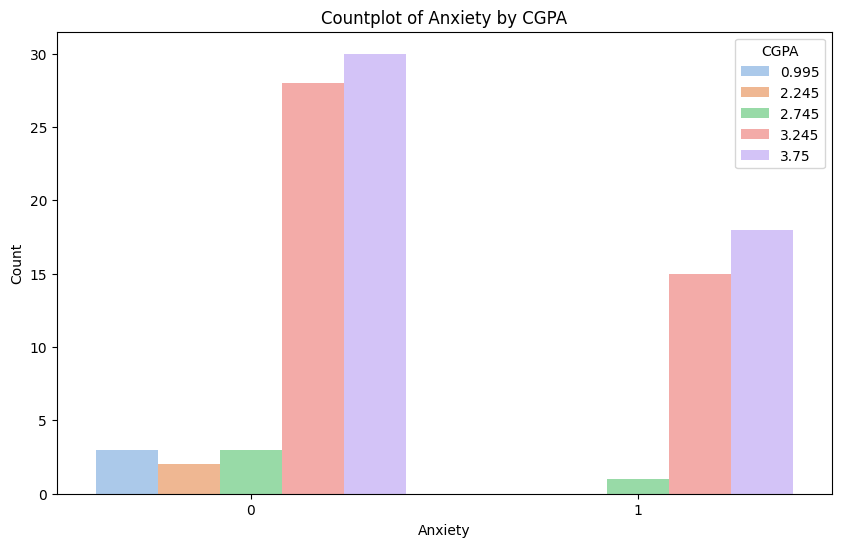

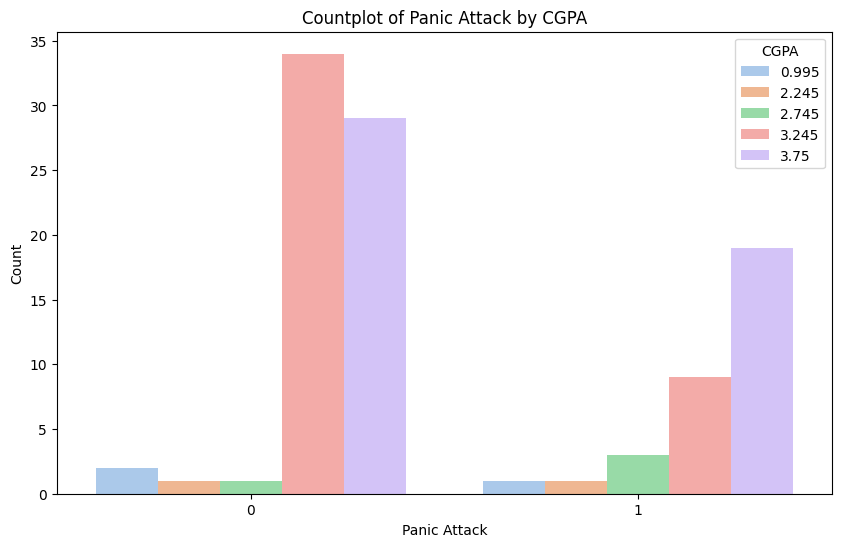

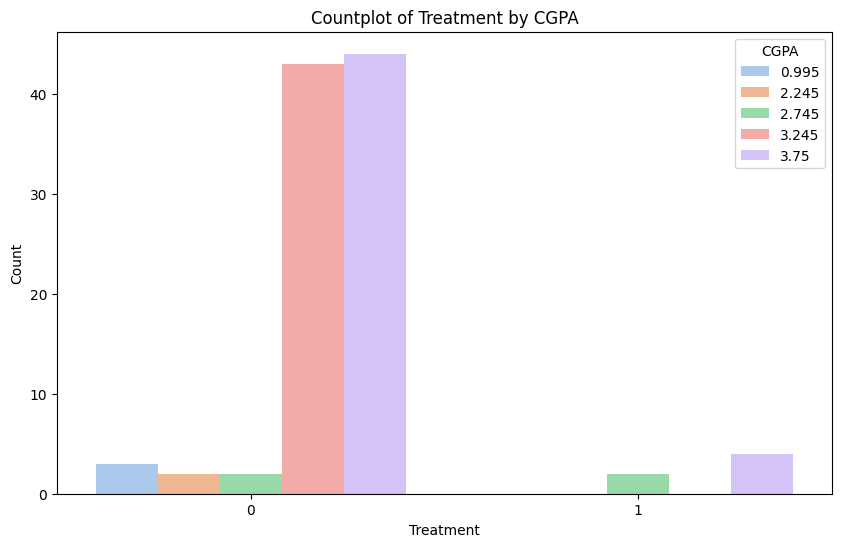

In [120]:
columns_of_interest = ['Gender', 'Age', 'Marital Status', 'Depression', 'Anxiety', 'Panic Attack', 'Treatment']

for column in columns_of_interest:
    # Pie chart
    data_pie = data[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(data_pie, labels=data_pie.index, autopct='%.0f%%', shadow=True, wedgeprops={"width": 0.3})
    plt.title(f'Distribution of {column}')
    plt.show()

    # Count plot
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue="CGPA", palette='pastel')
    plt.title(f'Countplot of {column} by CGPA')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

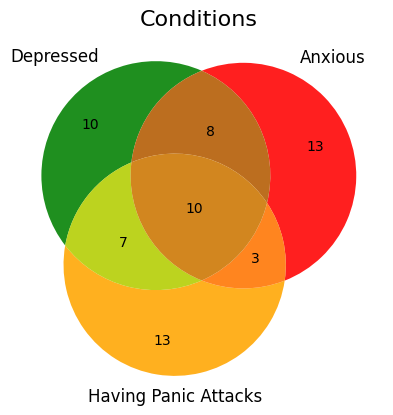

In [121]:
depressed = data[(data["Depression"] == 1)]
anxious = data[(data["Anxiety"] == 1)]
panicking = data[(data["Panic Attack"] == 1)]

venn3(subsets = [set(depressed.index),
                 set(anxious.index),
                 set(panicking.index)],
      set_labels = ("Depressed", "Anxious", "Having Panic Attacks"),
      set_colors = ("Green", "Red", "Orange"),
      alpha = 0.878)

plt.title("Conditions", fontsize = 16)
plt.show()

**MACHINE LEARNING/ MODEL TRAINING**

RandomForest

In [122]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [5]
}

In [123]:
X = data.drop(['Depression'], axis=1)
y = data['Depression']

In [124]:
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [2], 'n_estimators': [50]},
             scoring='accuracy')

In [126]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [127]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred)

In [129]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


KNN


In [130]:
param_grid_knn = {
    'knn__n_neighbors': [5],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [2]
}

In [131]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model_knn = KNeighborsClassifier()

In [133]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', model_knn)])

In [134]:
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [5], 'knn__p': [2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [135]:
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

Best Hyperparameters for KNN: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}


In [136]:
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test_knn)

In [137]:
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

In [138]:
print(f"Accuracy for KNN: {accuracy_knn:.2f}")

Accuracy for KNN: 0.95


### Table of Courses and Their Encoded Values

| Encoded Value | Course Name            |
|---------------|------------------------|
| 15            | Engineering            |
| 22            | Psychology             |
| 4             | Marine Science         |
| 27            | Economics              |
| 31            | Nursing                |
| 2             | Islamic Education      |
| 18            | Human Resources        |
| 20            | Psychology             |
| 33            | KENMS                  |
| 23            | Accounting             |
| 1             | BIT                    |
| 13            | IRKHS                  |
| 30            | Business Administration|
| 25            | Biomedical Science     |
| 5             | Marine Science         |
| 8             | Psychology             |
| 37            | Human Sciences         |
| 24            | Biomedical Science     |
| 36            | Biotechnology          |
| 35            | Communication          |
| 0             | Engineering            |
| 6             | Business Administration|
| 3             | Marine Science         |
| 21            | Law                    |
| 9             | Economics              |
| 14            | Nursing                |
| 29            | Communication          |
| 28            | Radiography            |
| 26            | Fiqh Fatwa             |
| 19            | Nursing                |
| 7             | Islamic Education      |
| 10            | Human Sciences         |
| 11            | Biomedical Science     |
| 34            | KIRKHS                 |
| 17            | Marine Science         |
| 12            | Business Administration|
| 16            | Communication          |
| 32            | Diploma Nursing        |

In [139]:
def predict_with_knn(model, input_features):
    feature_order = ['Gender', 'Age', 'Course', 'Year of Study', 'CGPA', 'Marital Status', 'Anxiety', 'Panic Attack', 'Treatment']
    try:
        input_data = np.array([input_features[feature] for feature in feature_order]).reshape(1, -1)
        prediction = model.predict(input_data)
        return "Depression Detected" if prediction[0] == 1 else "No Depression Detected"
    except KeyError as e:
        return f"Missing input for feature: {e}"

user_input = {
    'Gender': int(input("Enter Gender (0 for Female, 1 for Male): ")),
    'Age': float(input("Enter Age: ")),
    'Course': int(input("Enter Encoded Course Value (Refer to the above list): ")),
    'Year of Study': int(input("Enter Year of Study (1 to 4): ")),
    'CGPA': float(input("Enter CGPA (Midpoint value): ")),
    'Marital Status': int(input("Enter Marital Status (0 for No, 1 for Yes): ")),
    'Anxiety': int(input("Enter Anxiety (0 for No, 1 for Yes): ")),
    'Panic Attack': int(input("Enter Panic Attack (0 for No, 1 for Yes): ")),
    'Treatment': int(input("Enter Treatment (0 for No, 1 for Yes): "))
}

result = predict_with_knn(best_model_knn, user_input)
print("Prediction Result:", result)

Enter Gender (0 for Female, 1 for Male): 1
Enter Age: 19
Enter Encoded Course Value (Refer to the above list): 15
Enter Year of Study (1 to 4): 3
Enter CGPA (Midpoint value): 8.56
Enter Marital Status (0 for No, 1 for Yes): 0
Enter Anxiety (0 for No, 1 for Yes): 0
Enter Panic Attack (0 for No, 1 for Yes): 0
Enter Treatment (0 for No, 1 for Yes): 0
Prediction Result: No Depression Detected


In [142]:
import pickle

with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(best_model_knn, file)

In [141]:
print(np.__version__)
print(sklearn.__version__)

1.26.4
1.6.0


In [143]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_knn)
X_test_scaled = scaler.transform(X_test_knn)
model_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

# Train the KNN model
model_knn.fit(X_train_scaled, y_train_knn)
y_pred_knn = model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"Accuracy of KNN model: {accuracy_knn:.4f}")

Accuracy of KNN model: 0.9000


In [144]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model_knn, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)